In [4]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.special import hankel1,hankel2
from scipy.fftpack import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel2
from matplotlib import cm

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family'] = 'sans-serif'

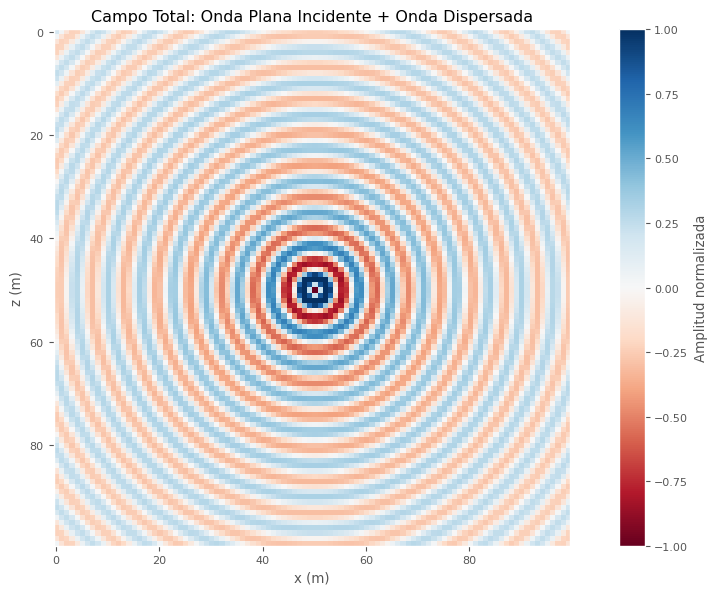

In [5]:


# 1. Definir los parámetros del problema
c = 2000.   # Velocidad de la onda (m/s)
omega = 2000.  # Frecuencia angular (rad/s)
dimension = 2  # Dimensión del problema (2D)
nx = 100      # Número de puntos en el eje X
nz = 100      # Número de puntos en el eje Z
dx = 1.       # Espaciado en X (m)
dz = 1.       # Espaciado en Z (m)
xorig = 0.    # Origen en X
zorig = 0.    # Origen en Z
U0 = 1.0      # Amplitud de la onda incidente

# 2. Calcular el número de onda
k = omega / c  # Número de onda

# 3. Definir las coordenadas espaciales
x = np.linspace(xorig, xorig + (nx - 1) * dx, nx)
z = np.linspace(zorig, zorig + (nz - 1) * dz, nz)
X, Z = np.meshgrid(x, z)

# 4. Definir la ubicación de la fuente dispersora
xs, zs = 50, 50  # Fuente dispersora en las coordenadas (50, 50)

# 5. Calcular la distancia desde la fuente dispersora
r = np.sqrt((X - xs)**2 + (Z - zs)**2)
r = np.where(r == 0, 1e-10, r)  # Evitar la singularidad en la fuente (r = 0)

# 6. Calcular la solución de Helmholtz para el campo dispersado (función de Green en 2D)
if dimension == 2:
    G = (1j/4) * hankel2(0, k * r)  # Función de Green en 2D
else:
    G = (1 / (4 * np.pi * r)) * np.exp(1j * k * r)  # Función de Green en 3D

# 7. Eliminar posibles NaNs (debido a singularidades) reemplazándolos por 0
G = np.nan_to_num(G)

# 8. Definir la onda plana incidente (en la dirección x)
u_inc = U0 * np.exp(1j * 2*k * X)

# 9. Campo total (suma de la onda plana incidente y el campo dispersado)
u_total = 10*G

# 10. Preparar los datos para las gráficas (tomamos la parte real)
u1 = u_total.real.T



fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(1, 1, 1, aspect=1)
plt.imshow(u1,cmap='RdBu',vmin=-1,vmax=1)  # Normalización de la solución
plt.grid(False)
plt.colorbar(label="Amplitud normalizada")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.title("Campo Total: Onda Plana Incidente + Onda Dispersada")
plt.tight_layout()
plt.show()
